# EDA

## Contents
#### 1. 데이터 기초정보 확인
#### 2. 연속형 변수 시각화  
    2-1. 분포상태 & 히스토그램 시각화 , 상관관계 시각화  
    2-2. 추세선 시각화   
        2-2-1. 월별 추세선 시각화  
        2-2-2. 시간별 추세선 시각화  
        
#### 3. 범주형 변수 시각화

In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

plt.style.use('fivethirtyeight')

In [4]:
# 데이터 불러오기 
# 기상청 일사량 데이터 추가 이후
df = pd.read_csv('donghae_solar_power_dataset2018_rev6.csv', index_col=0)

## 1. 데이터 기초정보 확인
- head 
- describe
- isnull
- dtype
- info

In [5]:
df.head()

,date,hour,humidity,rain,rain_type,temp,thunder,wind_angle,wind_direction,wind_velo,sky_con,solar_radiation_normal,season,SO2,CO,O3,NO2,PM10,PM25,power,date_time,solar_radiation
0,2018.1.1,6,17,0.0,0,4.7,0,289,1,2.8,1,0.00,0,0.002,0.4,0.034,0.005,17.0,12.0,0,2018-01-01-6,0.00
1,2018.1.1,7,19,0.0,0,3.4,0,278,1,2.7,1,0.00,0,0.003,0.4,0.032,0.006,19.0,12.0,0,2018-01-01-7,0.00
2,2018.1.1,8,14,0.0,0,2.7,0,268,8,2.3,1,0.00,0,0.002,0.5,0.030,0.009,19.0,12.0,7,2018-01-01-8,0.01
3,2018.1.1,9,18,0.0,0,2.3,0,268,8,2.3,2,4.78,0,0.003,0.5,0.031,0.008,17.0,13.0,245,2018-01-01-9,0.39
4,2018.1.1,10,20,0.0,0,2.1,0,250,8,3.0,2,17.79,0,0.003,0.5,0.033,0.006,14.0,11.5,776,2018-01-01-10,1.01


In [6]:
df.describe()

,hour,humidity,rain,rain_type,temp,thunder,wind_angle,wind_direction,wind_velo,sky_con,solar_radiation_normal,season,SO2,CO,O3,NO2,PM10,PM25,power,solar_radiation
count,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000,5475.000000
mean,13.000000,64.966575,0.137534,0.107580,12.476402,0.462283,213.375342,5.118904,1.856840,2.622283,197.144701,1.517808,0.002226,0.368840,0.035455,0.015341,33.435616,18.361297,344.679452,1.000458
std,4.320888,23.388769,0.942363,0.346609,9.182789,1.047376,92.680642,2.668768,1.217721,1.292094,260.771845,1.114312,0.001349,0.255194,0.019416,0.012101,22.742565,11.680583,390.048235,1.041250
min,6.000000,8.000000,0.000000,0.000000,-11.900000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.001000,0.100000,0.001000,0.001000,2.000000,1.000000,0.000000,0.000000
25%,9.000000,46.000000,0.000000,0.000000,5.500000,0.000000,187.500000,2.000000,1.000000,1.000000,0.000000,1.000000,0.001000,0.200000,0.023000,0.007000,18.000000,10.000000,18.000000,0.050000
50%,13.000000,69.000000,0.000000,0.000000,13.000000,0.000000,225.000000,7.000000,1.600000,3.000000,16.360000,2.000000,0.002000,0.300000,0.035000,0.011000,28.000000,15.000000,301.000000,0.600000
75%,17.000000,86.000000,0.000000,0.000000,20.000000,0.000000,273.000000,7.000000,2.400000,4.000000,388.010000,3.000000,0.003000,0.400000,0.046000,0.020000,43.000000,24.000000,410.000000,1.770000
max,20.000000,100.000000,32.000000,3.000000,32.500000,4.000000,360.000000,8.000000,10.100000,4.000000,948.440000,3.000000,0.014000,3.700000,0.136000,0.081000,210.000000,98.000000,1949.000000,3.990000


In [7]:
df.isnull().sum()

date                      0
hour                      0
humidity                  0
rain                      0
rain_type                 0
temp                      0
thunder                   0
wind_angle                0
wind_direction            0
wind_velo                 0
sky_con                   0
solar_radiation_normal    0
season                    0
SO2                       0
CO                        0
O3                        0
NO2                       0
PM10                      0
PM25                      0
power                     0
date_time                 0
solar_radiation           0
dtype: int64

In [8]:
df.dtypes

date                       object
hour                        int64
humidity                    int64
rain                      float64
rain_type                   int64
temp                      float64
thunder                     int64
wind_angle                  int64
wind_direction              int64
wind_velo                 float64
sky_con                     int64
solar_radiation_normal    float64
season                      int64
SO2                       float64
CO                        float64
O3                        float64
NO2                       float64
PM10                      float64
PM25                      float64
power                       int64
date_time                  object
solar_radiation           float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5475 entries, 0 to 5474
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    5475 non-null   object 
 1   hour                    5475 non-null   int64  
 2   humidity                5475 non-null   int64  
 3   rain                    5475 non-null   float64
 4   rain_type               5475 non-null   int64  
 5   temp                    5475 non-null   float64
 6   thunder                 5475 non-null   int64  
 7   wind_angle              5475 non-null   int64  
 8   wind_direction          5475 non-null   int64  
 9   wind_velo               5475 non-null   float64
 10  sky_con                 5475 non-null   int64  
 11  solar_radiation_normal  5475 non-null   float64
 12  season                  5475 non-null   int64  
 13  SO2                     5475 non-null   float64
 14  CO                      5475 non-null   

### 범주형 변수 변환

In [10]:
df['rain_type'] = df['rain_type'].astype('int64')
df['rain_type'] = df['rain_type'].astype('category')
df['sky_con'] = df['sky_con'].astype('int64')
df['sky_con'] = df['sky_con'].astype('category')
df['thunder'] = df['thunder'].astype('int64')
df['thunder'] = df['thunder'].astype('category')

## 2. 연속형 변수 시각화

### 2-1. 분포형태 시각화 (boxplot & histplot)

#### 습도

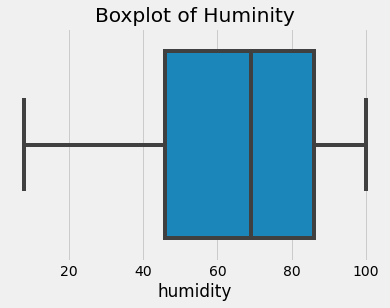

In [12]:
# 습도 
sns.boxplot('humidity', data=df).set_title('Boxplot of Huminity')
plt.show()

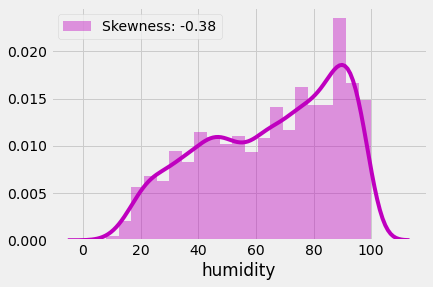

In [13]:
g=sns.distplot(df['humidity'], color='m', label ='Skewness: %.2f' %(df['humidity'].skew()))
g=g.legend(loc='best')

#### 강수량

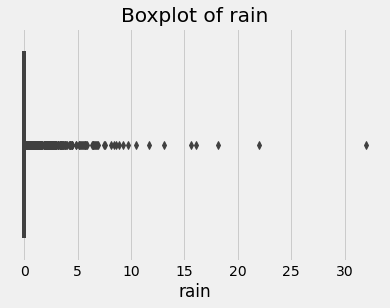

In [14]:
sns.boxplot('rain', data=df).set_title('Boxplot of rain')
plt.show()

/Users/jin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


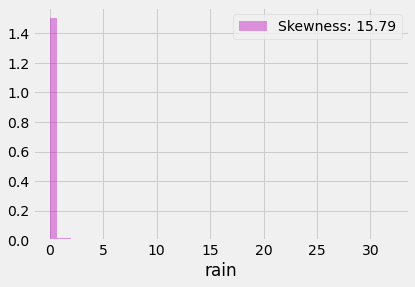

In [15]:
g=sns.distplot(df['rain'], color='m', label ='Skewness: %.2f' %(df['rain'].skew()))
g=g.legend(loc='best')

#### 기온

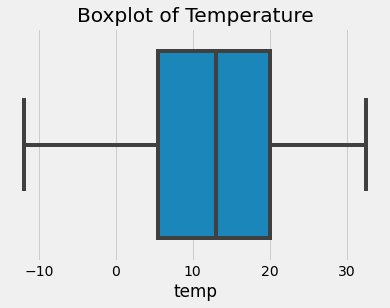

In [16]:
sns.boxplot('temp', data=df).set_title('Boxplot of Temperature')
plt.show()

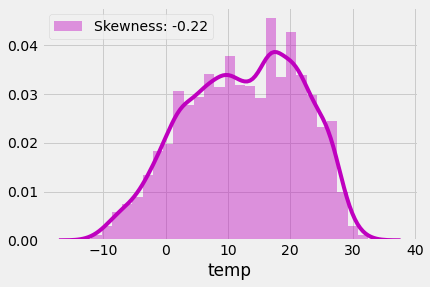

In [17]:
g=sns.distplot(df['temp'], color='m', label ='Skewness: %.2f' %(df['temp'].skew()))
g=g.legend(loc='best')

#### 풍향

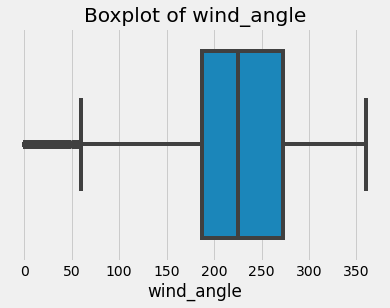

In [18]:
sns.boxplot('wind_angle', data=df).set_title('Boxplot of wind_angle')
plt.show()

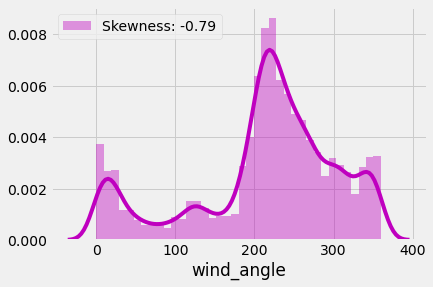

In [19]:
g=sns.distplot(df['wind_angle'], color='m', label ='Skewness: %.2f' %(df['wind_angle'].skew()))
g=g.legend(loc='best')

#### 풍속

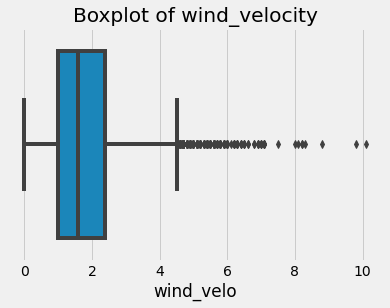

In [20]:
sns.boxplot('wind_velo', data=df).set_title('Boxplot of wind_velocity')
plt.show()

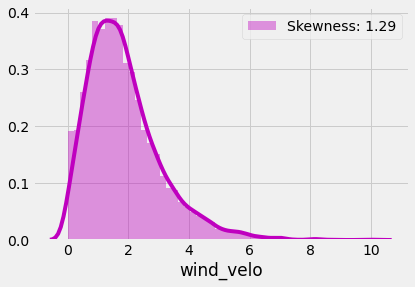

In [21]:
g=sns.distplot(df['wind_velo'], color='m', label ='Skewness: %.2f' %(df['wind_velo'].skew()))
g=g.legend(loc='best')

#### 일사량

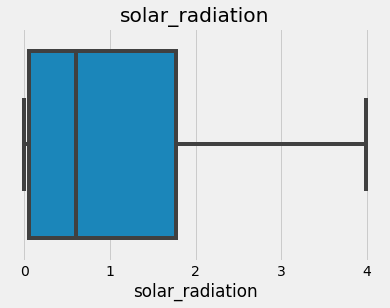

In [22]:
sns.boxplot('solar_radiation', data=df).set_title('solar_radiation')
plt.show()

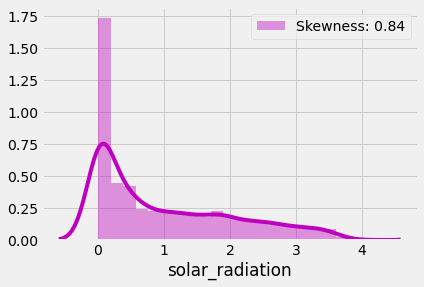

In [23]:
g=sns.distplot(df['solar_radiation'], color='m', label ='Skewness: %.2f' %(df['solar_radiation'].skew()))
g=g.legend(loc='best')

#### 태양광 발전량

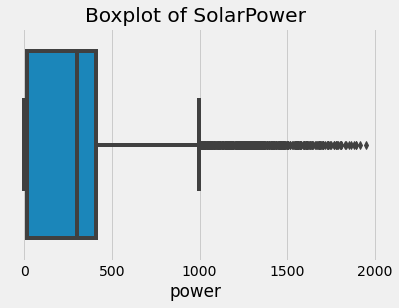

In [24]:
sns.boxplot('power', data=df).set_title('Boxplot of SolarPower')
# fig = plt.gcf()
# fig.set_size_inches(10,5)
plt.show()

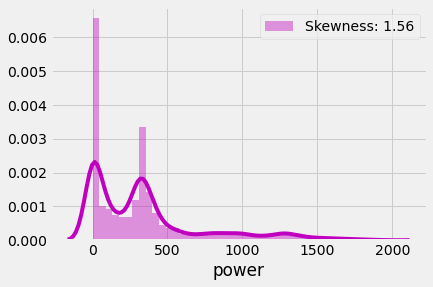

In [25]:
g=sns.distplot(df['power'], color='m', label ='Skewness: %.2f' %(df['power'].skew()))
g=g.legend(loc='best')

#### PM10

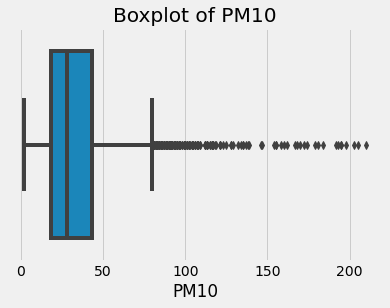

In [26]:
sns.boxplot('PM10', data=df).set_title('Boxplot of PM10')
plt.show()

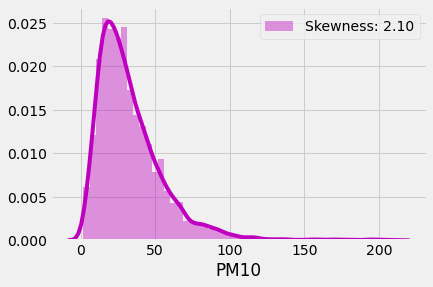

In [27]:
g=sns.distplot(df['PM10'], color='m', label ='Skewness: %.2f' %(df['PM10'].skew()))
g=g.legend(loc='best')

#### PM25

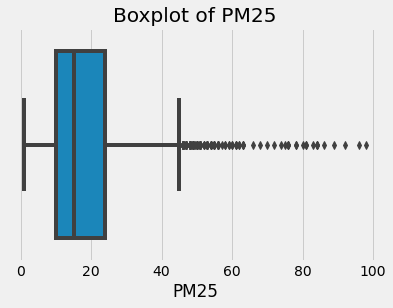

In [29]:
sns.boxplot('PM25', data=df).set_title('Boxplot of PM25')
plt.show()

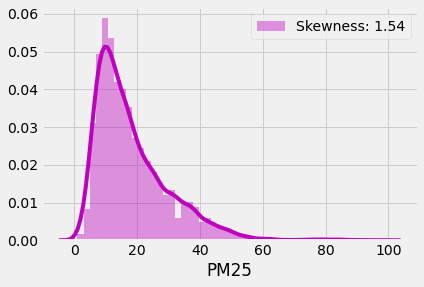

In [30]:
g=sns.distplot(df['PM25'], color='m', label ='Skewness: %.2f' %(df['PM25'].skew()))
g=g.legend(loc='best')

#### O3

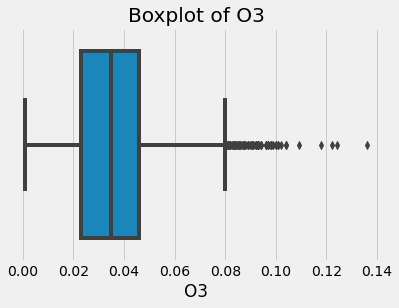

In [33]:
sns.boxplot('O3', data=df).set_title('Boxplot of O3')
plt.show()

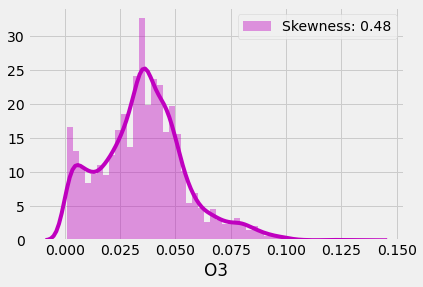

In [34]:
g=sns.distplot(df['O3'], color='m', label ='Skewness: %.2f' %(df['O3'].skew()))
g=g.legend(loc='best')

#### NO2

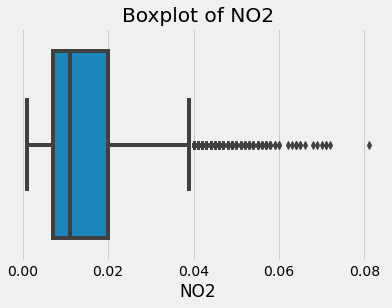

In [37]:
sns.boxplot('NO2', data=df).set_title('Boxplot of NO2')
plt.show()

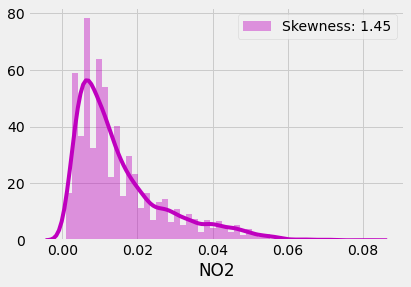

In [38]:
g=sns.distplot(df['NO2'], color='m', label ='Skewness: %.2f' %(df['NO2'].skew()))
g=g.legend(loc='best')

#### 상관관계 (히트맵)

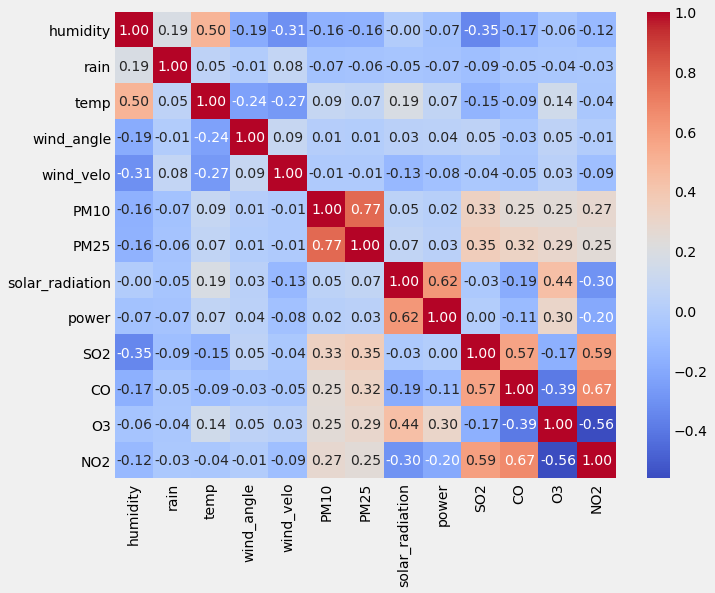

In [39]:
# correlation matrix between numerical values
g = sns.heatmap(df[['humidity','rain', 'temp', 'wind_angle',
                   'wind_velo', 'PM10', 'PM25', 'solar_radiation' , 'power', 'SO2','CO', 'O3','NO2'
                   ]].corr(), annot=True, fmt ='.2f', cmap='coolwarm')

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 2-2. 추세선 시각화
    1) 월별 추세  
    2) 시간별 추세 

#### 1) 월별 추세

In [40]:
df['month'] = 0
for i in range(len(df.date)):
    df['month'][i] = df['date_time'][i][5:7]
    
df.head()

<ipython-input-40-12c4f5389833>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][i] = df['date_time'][i][5:7]


,date,hour,humidity,rain,rain_type,temp,thunder,wind_angle,wind_direction,wind_velo,sky_con,solar_radiation_normal,season,SO2,CO,O3,NO2,PM10,PM25,power,date_time,solar_radiation,month
0,2018.1.1,6,17,0.0,0,4.7,0,289,1,2.8,1,0.00,0,0.002,0.4,0.034,0.005,17.0,12.0,0,2018-01-01-6,0.00,1
1,2018.1.1,7,19,0.0,0,3.4,0,278,1,2.7,1,0.00,0,0.003,0.4,0.032,0.006,19.0,12.0,0,2018-01-01-7,0.00,1
2,2018.1.1,8,14,0.0,0,2.7,0,268,8,2.3,1,0.00,0,0.002,0.5,0.030,0.009,19.0,12.0,7,2018-01-01-8,0.01,1
3,2018.1.1,9,18,0.0,0,2.3,0,268,8,2.3,2,4.78,0,0.003,0.5,0.031,0.008,17.0,13.0,245,2018-01-01-9,0.39,1
4,2018.1.1,10,20,0.0,0,2.1,0,250,8,3.0,2,17.79,0,0.003,0.5,0.033,0.006,14.0,11.5,776,2018-01-01-10,1.01,1


#### 발전량

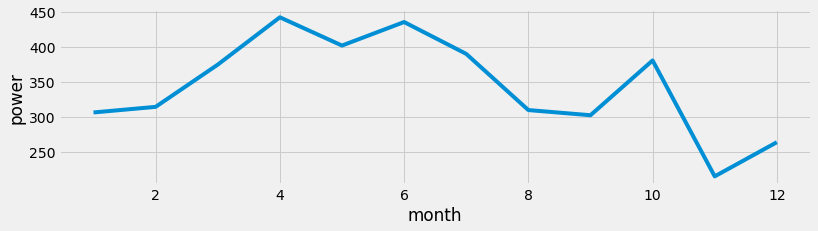

In [41]:
df['power'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('power')
plt.show()

#### 일사량

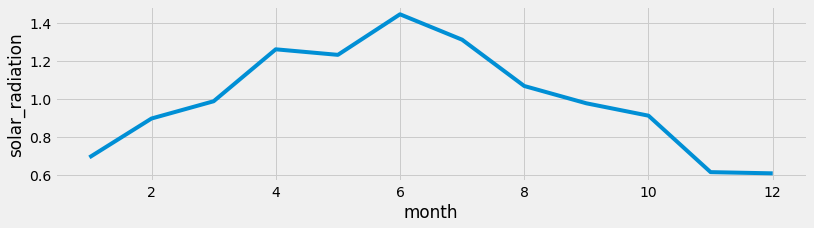

In [42]:
df['solar_radiation'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('solar_radiation')
plt.show()

#### 습도

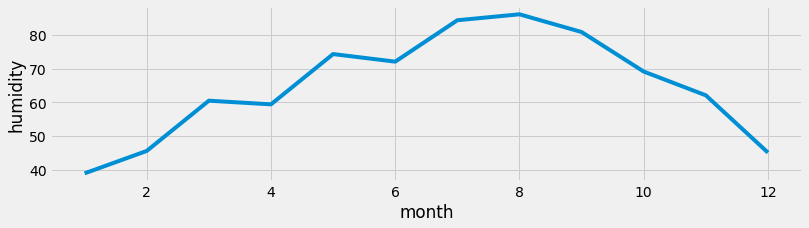

In [43]:
df['humidity'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('humidity')
plt.show()

#### 기온

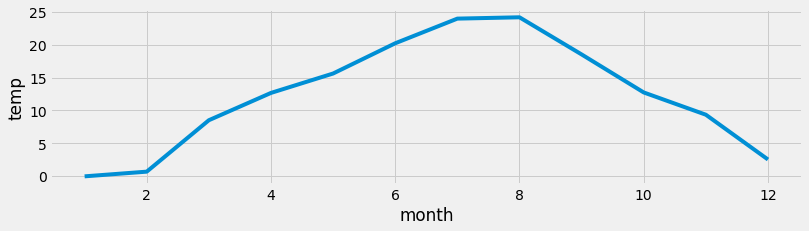

In [44]:
df['temp'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('temp')
plt.show()

#### NO2

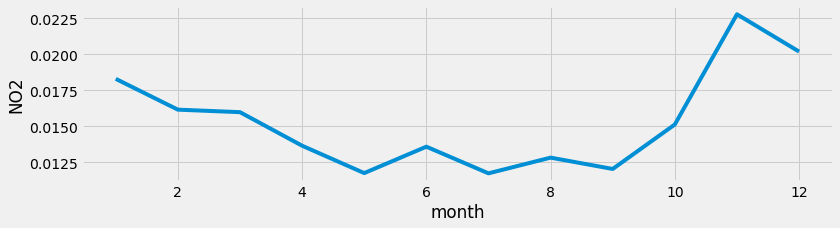

In [45]:
df['NO2'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('NO2')
plt.show()

#### PM25

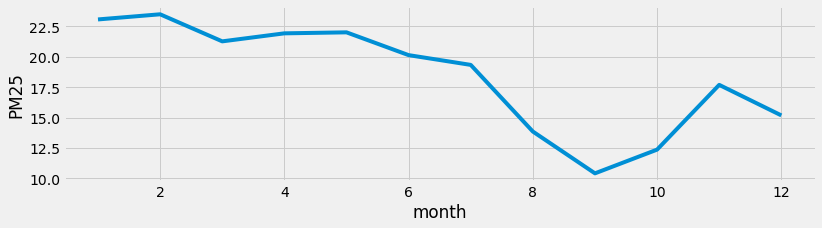

In [46]:
df['PM25'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('PM25')
plt.show()

#### PM10

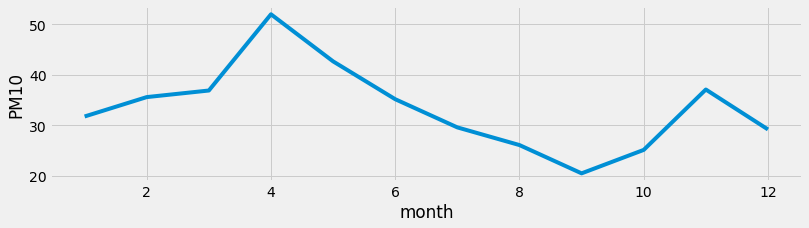

In [47]:
df['PM10'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('PM10')
plt.show()

#### O3

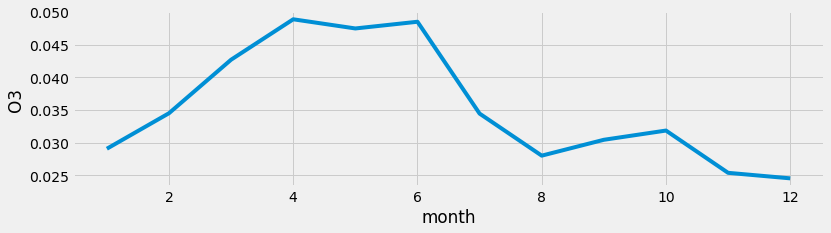

In [48]:
df['O3'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('O3')
plt.show()

#### 풍속

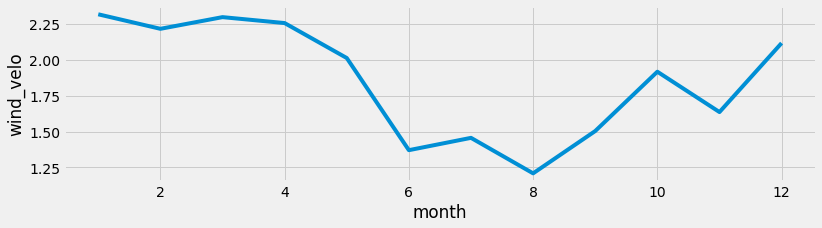

In [49]:
df['wind_velo'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('wind_velo')
plt.show()

#### 풍향

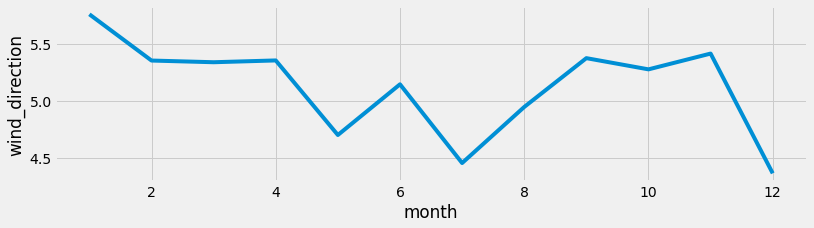

In [50]:
df['wind_direction'].groupby([df.month]).mean().plot(figsize=(12,3))
plt.ylabel('wind_direction')
plt.show()

#### 하늘상태

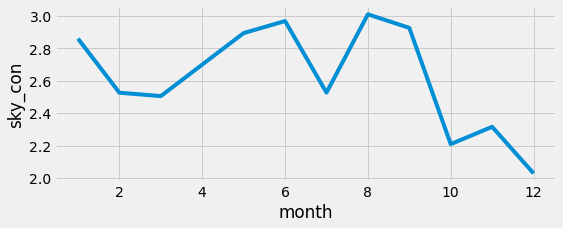

In [52]:
df['sky_con'] = df['sky_con'].astype('int64')
df['sky_con'].groupby([df.month]).mean().plot(figsize=(8,3))
plt.ylabel('sky_con')
plt.show()

#### 강수량

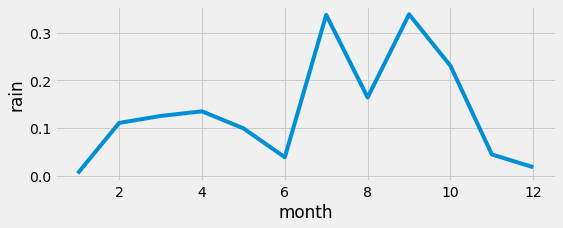

In [53]:
df['rain'].groupby([df.month]).mean().plot(figsize=(8,3))
plt.ylabel('rain')
plt.show()

#### 2) 시간별 추세
    - 겨울 : 발전량, 일사량, 기온, 바람방향 
    - 봄 : 발전량, 일사량, 기온, 바람방향
    - 여름 : 발전량, 일사량, 기온, 바람방향
    - 가을 : 발전량, 일사량, 기온, 바람방향

#### 발전량 & 일사량

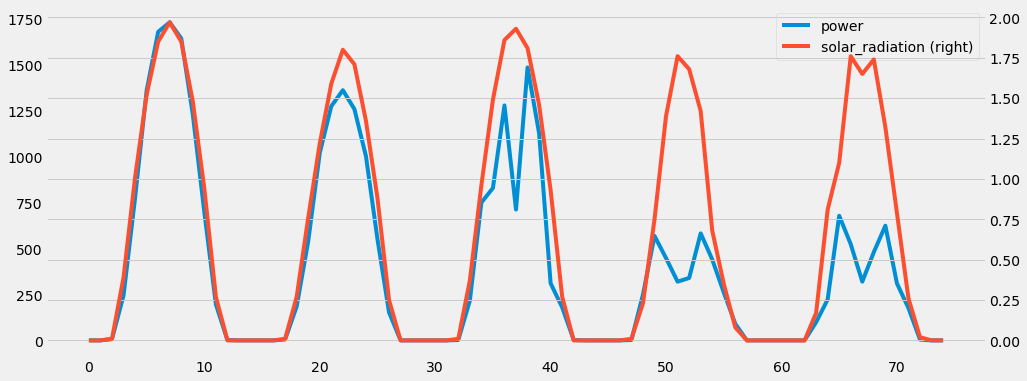

In [54]:
df[['power', 'solar_radiation']][:75].plot(secondary_y='solar_radiation', figsize=(15,6))
plt.show()

#### 겨울 시간별 발전량 

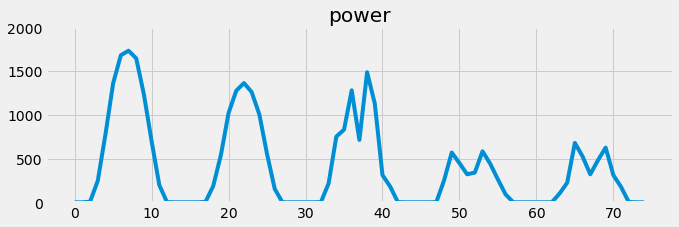

In [66]:
df.power[0:75].plot(ylim = (0,2000), title='power')
fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 겨울 시간별 일사량

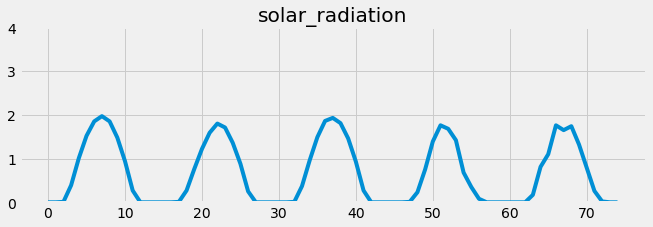

In [67]:
df.solar_radiation[0:75].plot(ylim=(0,4), title='solar_radiation')
fig = plt.gcf()
fig.set_size_inches(10,3)
plt.show()

#### 겨울 시간별 기온

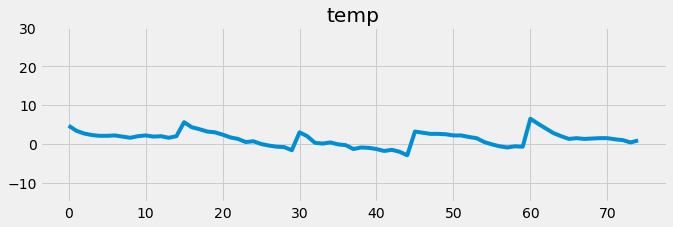

In [68]:
df.temp[0:75].plot(ylim=(-15,30), title='temp')
fig = plt.gcf()
fig.set_size_inches(10,3)
plt.show()

#### 겨울 시간별 바람방향

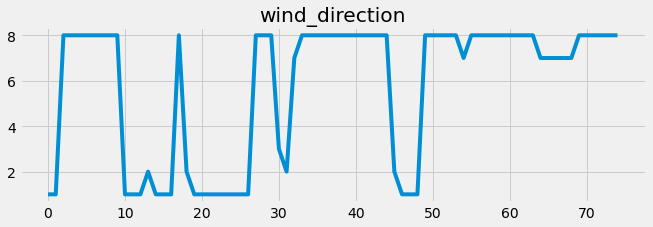

In [69]:
df.wind_direction[0:75].plot(title='wind_direction')
fig = plt.gcf()
fig.set_size_inches(10,3)
plt.show()

#### 봄 시간별 발전량

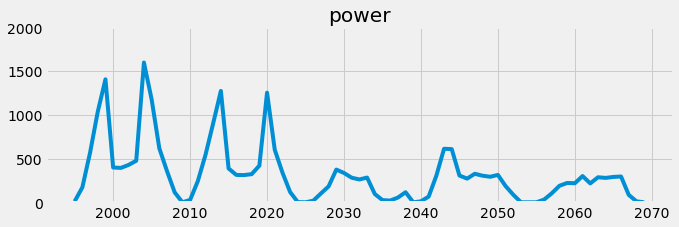

In [70]:
df.power[1995:2070].plot(ylim=(0,2000), title='power')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 봄 시간별 일사량

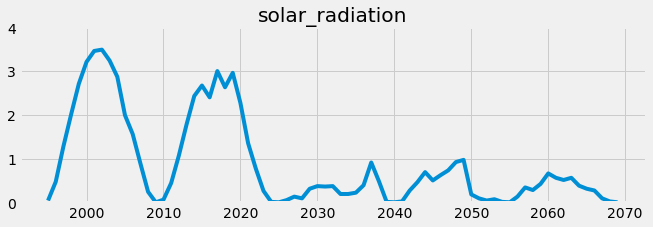

In [71]:
df.solar_radiation[1995:2070].plot(ylim=(0,4), title='solar_radiation')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 봄 시간별 기온

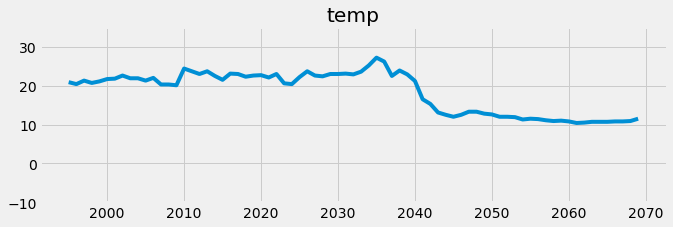

In [72]:
df.temp[1995:2070].plot(ylim=(-10,35), title='temp')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 봄 시간별 바람방향

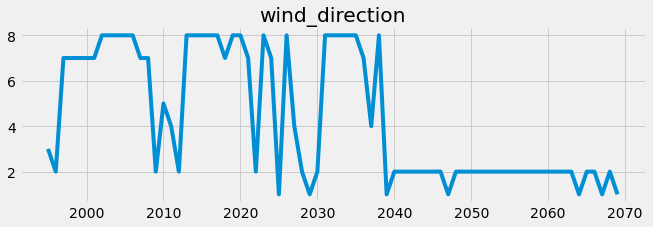

In [73]:
df.wind_direction[1995:2070].plot(title='wind_direction')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 여름 시간별 발전량

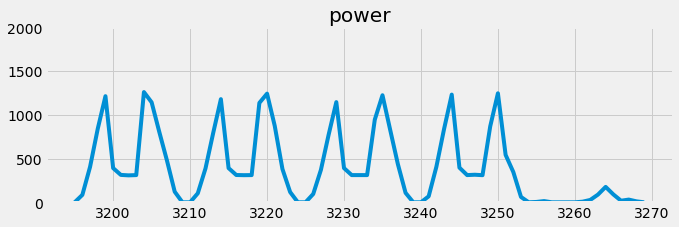

In [74]:
df.power[3195:3270].plot(ylim=(0,2000), title='power')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 여름 시간별 일사량

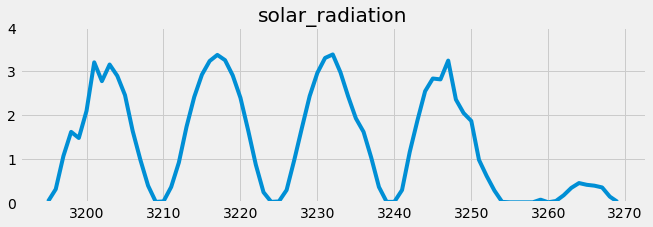

In [75]:
df.solar_radiation[3195:3270].plot(ylim=(0,4), title='solar_radiation')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 여름 시간별 기온

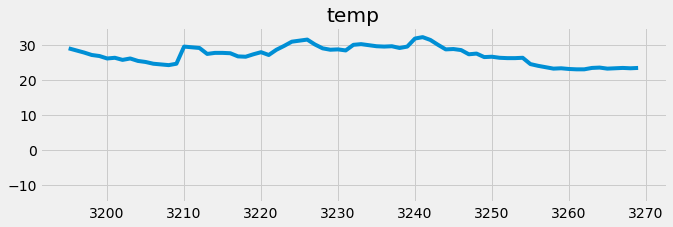

In [76]:
df.temp[3195:3270].plot(ylim=(-15,35), title='temp')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 여름 시간별 바람방향

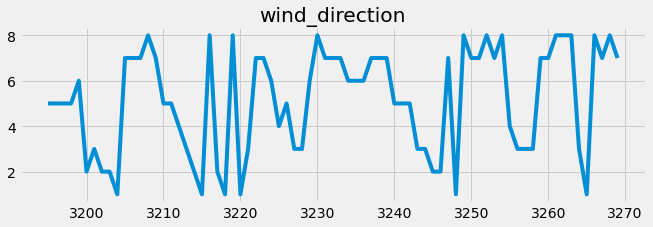

In [77]:
df.wind_direction[3195:3270].plot(title = 'wind_direction')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 가을 시간별 발전량

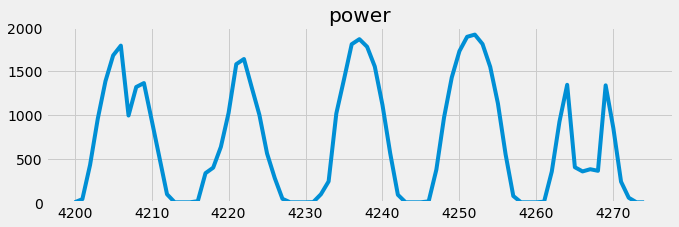

In [78]:
df.power[4200:4275].plot(ylim=(0,2000), title='power')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 가을 시간별 일사량

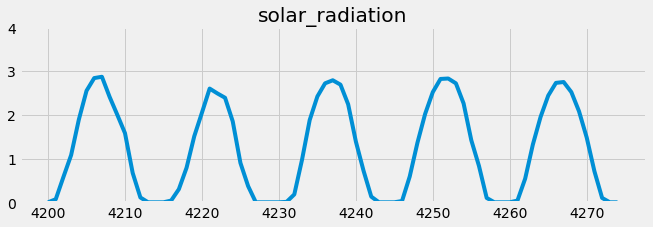

In [79]:
df.solar_radiation[4200:4275].plot(ylim=(0,4), title='solar_radiation')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 가을 시간별 기온

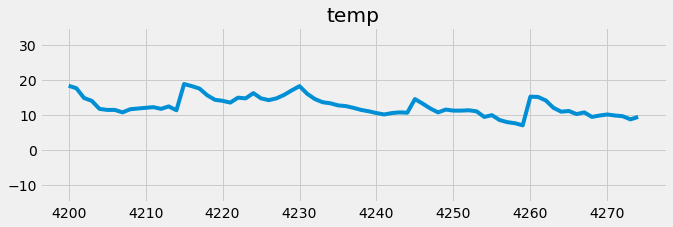

In [80]:
df.temp[4200:4275].plot(ylim=(-15,35), title='temp')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

#### 가을 시간별 바람방향

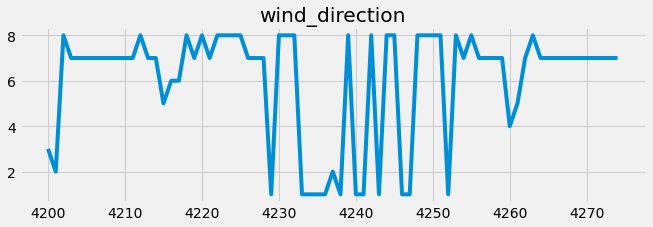

In [81]:
df.wind_direction[4200:4275].plot(title='wind_direction')

fig = plt.gcf()
fig.set_size_inches(10,3)

plt.show()

## 3. 범주형 변수 시각화

#### 하늘상태별 일사량

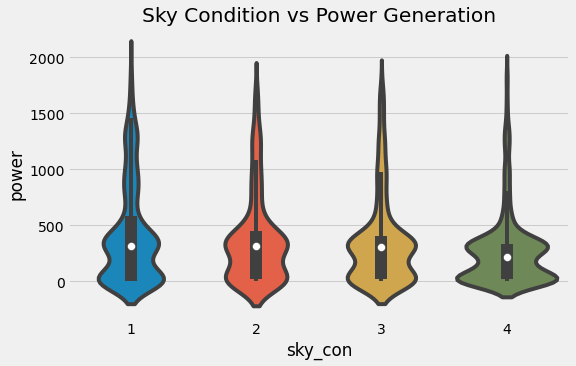

In [55]:
df['sky_con'] = df['sky_con'].astype('category')
sns.violinplot(x='sky_con', y='power', data= df).set_title('Sky Condition vs Power Generation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()


#### 하늘상태별 일사량 추정치

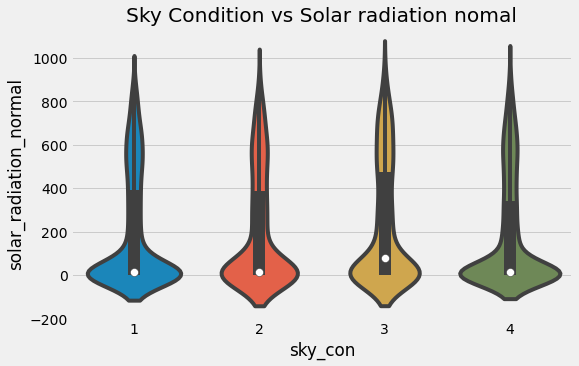

In [56]:
sns.violinplot(x='sky_con', y='solar_radiation_normal', data= df).set_title('Sky Condition vs Solar radiation nomal')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 하늘상태별 일사량(기상청 데이터)

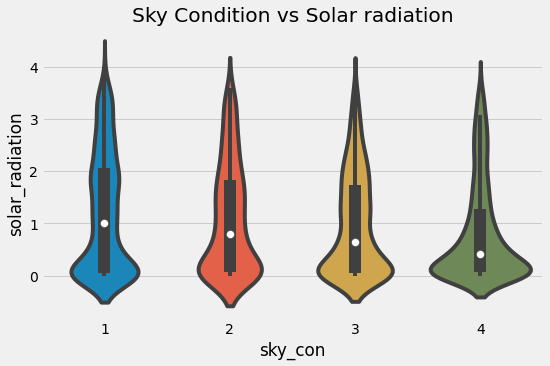

In [13]:
sns.violinplot(x='sky_con', y='solar_radiation', data= df).set_title('Sky Condition vs Solar radiation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 강수상태별 발전량 

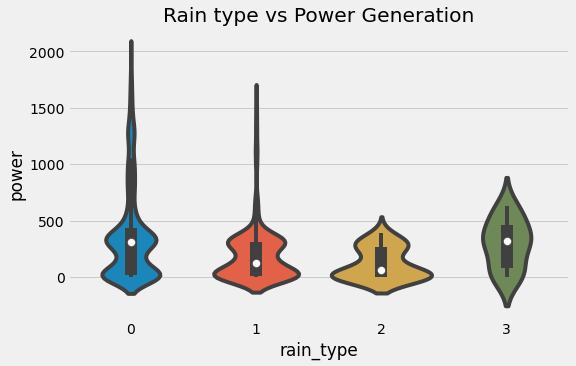

In [57]:
sns.violinplot(x='rain_type', y='power', data= df).set_title('Rain type vs Power Generation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 강수상태별 일사량 추정치

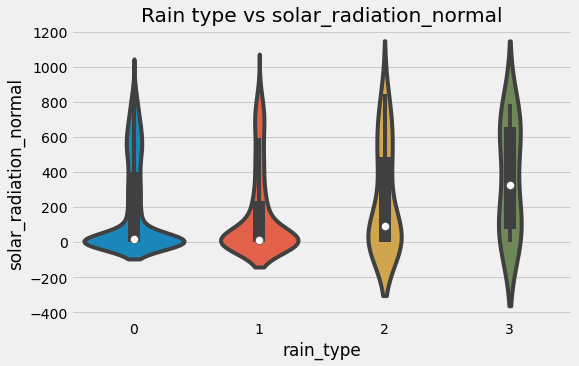

In [58]:
sns.violinplot(x='rain_type', y='solar_radiation_normal', data= df).set_title('Rain type vs solar_radiation_normal')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 강수상태별 일사량 (기상청 데이터)

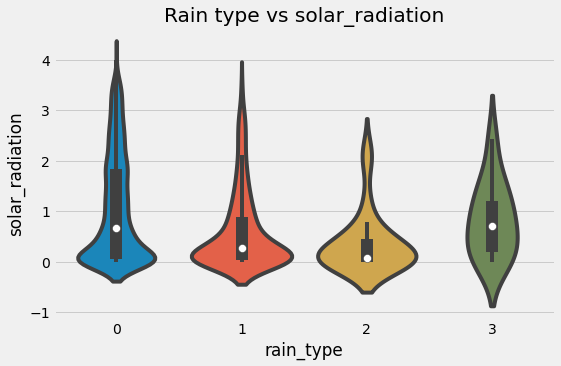

In [59]:
sns.violinplot(x='rain_type', y='solar_radiation', data= df).set_title('Rain type vs solar_radiation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 계절별 발전량 

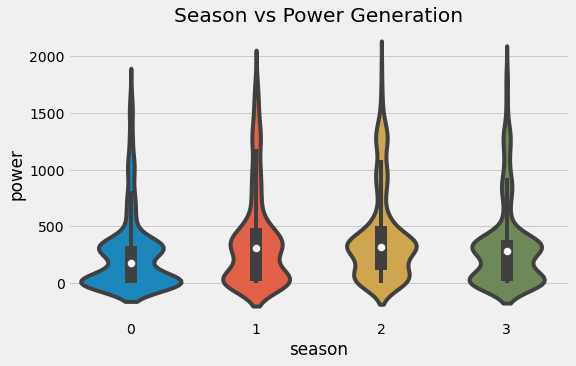

In [60]:
sns.violinplot(x='season', y='power', data= df).set_title('Season vs Power Generation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 계절별 일사량 추정치

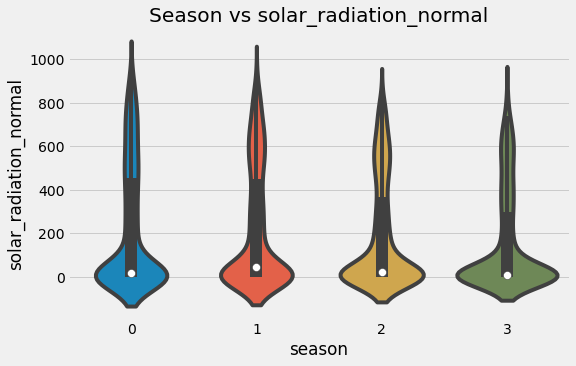

In [61]:
sns.violinplot(x='season', y='solar_radiation_normal', data= df).set_title('Season vs solar_radiation_normal')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 계절별 일사량 (기상청 데이터)

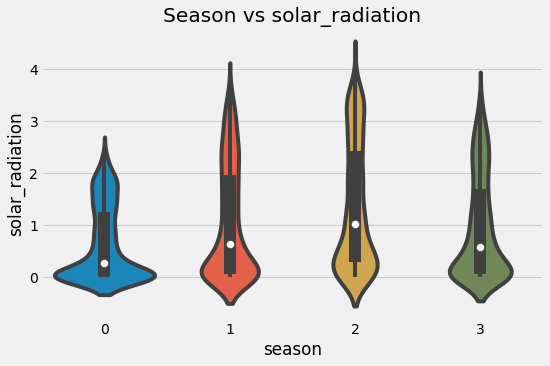

In [62]:
sns.violinplot(x='season', y='solar_radiation', data= df).set_title('Season vs solar_radiation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 바람방향별 발전량

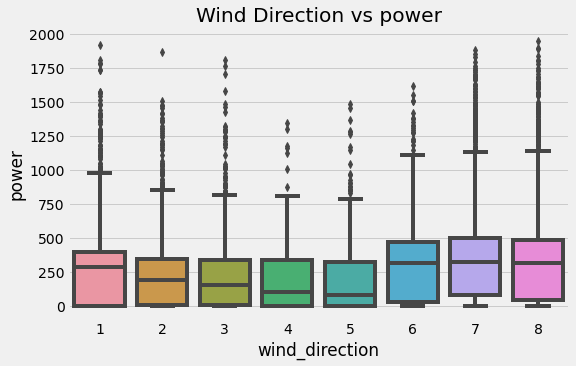

In [63]:
sns.boxplot(x='wind_direction', y='power', data= df).set_title('Wind Direction vs power')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 바람방향별 일사량 추정치

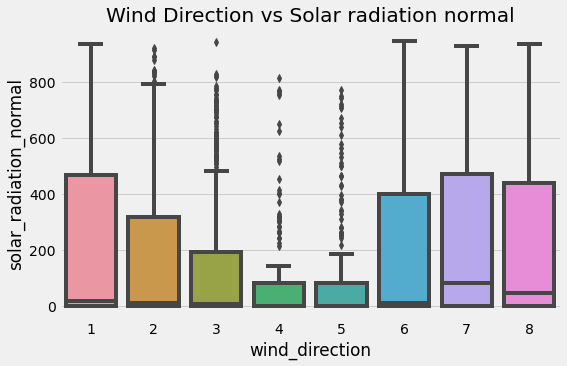

In [64]:
sns.boxplot(x='wind_direction', y='solar_radiation_normal', data= df).set_title('Wind Direction vs Solar radiation normal')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

#### 바람방향별 일사량 

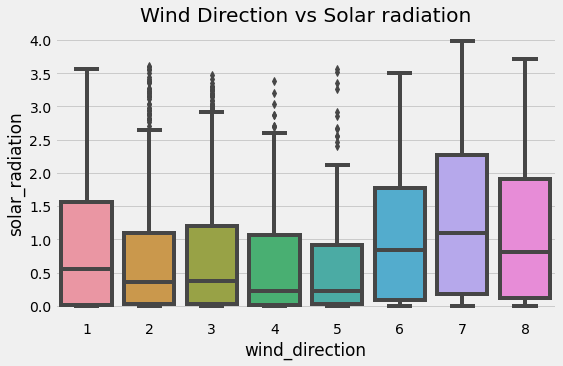

In [65]:
sns.boxplot(x='wind_direction', y='solar_radiation', data= df).set_title('Wind Direction vs Solar radiation')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()